# Import Necessary Libraries

In [1]:
import pandas as pd 
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import shap
from Explainer import *

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
2025-01-21 20:55:26.109455: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load Dataset

In [2]:
data = pd.read_csv("Alzheimer/Dataset/alzheimer_disease.csv")

# Explore Dataset

In [3]:
data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [5]:
data.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Preprocessing

In [6]:
data.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [7]:
data.duplicated().sum()

0

In [8]:
data = data[['Age', 'Gender', 'Ethnicity', 'EducationLevel', 'BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'MemoryComplaints', 'BehavioralProblems', 'ADL', 'Diagnosis']]

In [9]:
data.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,...,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Diagnosis
0,73,0,0,2,22.927749,13.297218,6.327112,1.347214,9.025679,142,...,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0
1,89,0,0,0,26.827681,4.542524,7.619885,0.518767,7.151293,115,...,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0
2,73,0,3,1,17.795882,19.555085,7.844988,1.826335,9.673574,99,...,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0
3,74,1,0,1,33.800817,12.209266,8.428001,7.435604,8.392554,118,...,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0
4,89,0,0,0,20.716974,18.454356,6.310461,0.795498,5.597238,94,...,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0


Gender distribution:
 1    1088
0    1061
Name: Gender, dtype: int64


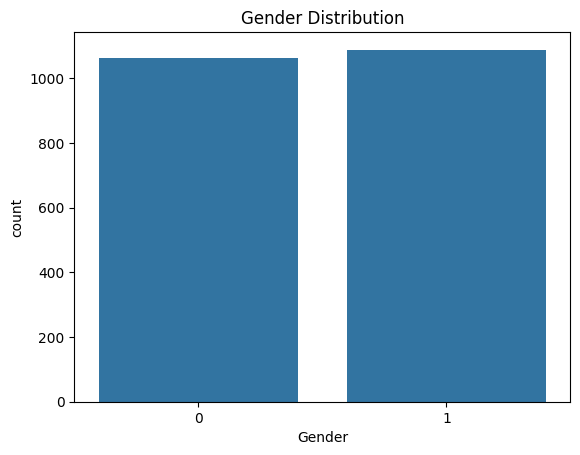

In [10]:
gender_counts = data['Gender'].value_counts()
print("Gender distribution:\n", gender_counts)
sns.countplot(x='Gender', data=data)
plt.title('Gender Distribution')
plt.show()

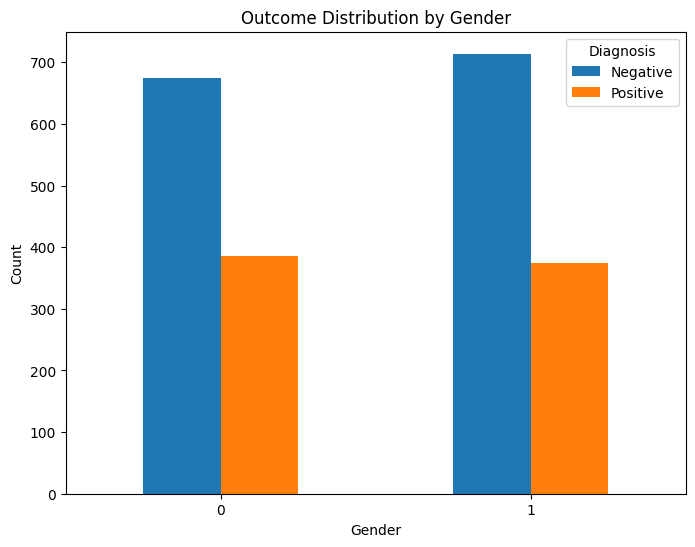

In [11]:
# Group the data by gender and outcome
grouped = data.groupby(['Gender', 'Diagnosis']).size().unstack(fill_value=0)

# Create a bar plot
grouped.plot(kind='bar', figsize=(8, 6))

# Set plot labels and title
plt.title('Outcome Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0) # Rotate x-axis labels for readability
plt.legend(title='Diagnosis', labels=['Negative', 'Positive'])

# Split the data into Training and Testing

In [12]:
X = data.drop('Diagnosis', axis=1)
y = data['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)

# Random Forest Classifier

In [ ]:
# train from scratch
# naiveModel = RandomForestClassifier() #max_depth=15, max_features='sqrt', min_samples_leaf=2, min_samples_split=5, n_estimators=200
# naiveModel.fit(X_train,y_train) 
# y_pred = naiveModel.predict(X_test)

In [14]:
filename = 'random_forest_classifier.sav'
naiveModel = pickle.load(open('Alzheimer/Models/'+filename, 'rb'))
y_pred = naiveModel.predict(X_test)

Trying to unpickle estimator DecisionTreeClassifier from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
Trying to unpickle estimator RandomForestClassifier from version 1.5.1 when using version 1.5.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


In [ ]:
#Save the trained model
#pickle.dump(naiveModel, open('Alzheimer/Models/'+filename, 'wb'))

# Prediction Report

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       272
           1       0.94      0.94      0.94       158

    accuracy                           0.96       430
   macro avg       0.95      0.95      0.95       430
weighted avg       0.96      0.96      0.96       430

0.958139534883721
[[263   9]
 [  9 149]]


<Axes: >

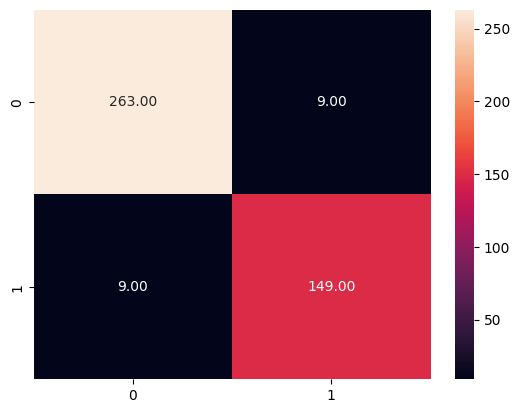

In [15]:
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))
confusion = confusion_matrix(y_test, y_pred)
print(confusion)
sns.heatmap(confusion, annot=True, fmt=".2f")

# Test Model Fairness

In [16]:
# fairlearn
from fairlearn.metrics import (
    false_positive_rate,
    false_negative_rate,
    true_positive_rate,
    MetricFrame,
    equalized_odds_difference,
    demographic_parity_difference,
)

def score(
    y_train,
    y_train_pred,
    y_test,
    y_test_pred,
    sensitive_features_train,
    sensitive_features_test,
    metrics={"accuracy": accuracy_score, "fpr": false_positive_rate, "fnr": false_negative_rate,},
):
    """
    Helper function to evaluate classifiers without too much repetition of code.
    """

    # training set
    mf_train = MetricFrame(
        metrics=metrics,
        y_true=y_train,
        y_pred=y_train_pred,
        sensitive_features=sensitive_features_train,
    )

    # test set
    mf_test = MetricFrame(
        metrics=metrics,
        y_true=y_test,
        y_pred=y_test_pred,
        sensitive_features=sensitive_features_test,
    )

    # display results
    display(
        pd.concat(
            [mf_train.by_group, mf_test.by_group], keys=["train", "test"]
        ).unstack(level=0)
    )

    # compute metrics
    print(
        "equalized odds (test): %.2f"
        % equalized_odds_difference(
            y_true=y_test,
            y_pred=y_test_pred,
            sensitive_features=sensitive_features_test,
        )
    )
    
    print(
        "demographic parity (test): %.2f"
        % demographic_parity_difference(
            y_true=y_test,
            y_pred=y_test_pred,
            sensitive_features=sensitive_features_test,
        )
    )

    print("accuracy (test): %.2f" % accuracy_score(y_true=y_test, y_pred=y_test_pred))
    return

In [17]:
score(
    y_train,
    naiveModel.predict(X_train),
    y_test,
    naiveModel.predict(X_test),
    X_train["Gender"],
    X_test["Gender"],
)

accuracy             fpr            fnr          
          train      test train     test train      test
Gender                                                  
0           1.0  0.966507   0.0  0.02459   0.0  0.045977
1           1.0  0.950226   0.0     0.04   0.0  0.070423

equalized odds (test): 0.02
demographic parity (test): 0.09
accuracy (test): 0.96


# Test Which Features are Influencing the Prediction

In [ ]:
#shap_explainer = shap.Explainer(naiveModel)
#shap_values = shap_explainer.shap_values(X_train)
#shap.summary_plot(shap_values, X_train, feature_names=data.columns)

# Prepare the Affected Dataset

In [ ]:
# Find instances where the model predicted target class 1
predicted_target_1_instances = X_test[y_pred == 1]
print(predicted_target_1_instances['Gender'].value_counts())

# Save the filtered instances to a new dataset
predicted_target_1_instances.to_csv('Alzheimer/Dataset/predicted_target_1_instances.csv', index=False)

In [ ]:
# Decompose the dataset into clusters
from sklearn.cluster import KMeans

def decompose_into_clusters(affected_dataset, n_clusters=3, random_state=42):
    
    if not isinstance(affected_dataset, pd.DataFrame):
        affected_dataset = pd.DataFrame(affected_dataset)

    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    cluster_labels = kmeans.fit_predict(affected_dataset)

    # Add the cluster labels to the original dataset
    clustered_dataset = affected_dataset.copy()
    clustered_dataset['Cluster'] = cluster_labels

    return clustered_dataset, kmeans

def get_cluster_dataframes(clustered_dataset):
    
    # Group the dataset by cluster and create separate DataFrames
    cluster_dataframes = {
        cluster_label: clustered_dataset[clustered_dataset['Cluster'] == cluster_label].drop(columns=['Cluster'])
        for cluster_label in clustered_dataset['Cluster'].unique()
    }

    return cluster_dataframes

affected_dataset = predicted_target_1_instances
clustered_data, kmeans_model = decompose_into_clusters(affected_dataset, n_clusters=3)
cluster_dfs = get_cluster_dataframes(clustered_data)

for cluster_label, df in cluster_dfs.items():
    df.to_csv(f"Alzheimer/Dataset/cluster_{cluster_label}.csv", index=False)

In [8]:
import sys
path = './log.txt'
sys.stdout = open(path, 'w')

# RL Agent Training

In [ ]:
dataset = data # whole dataset
# For affected_dataset, you can load and pass the clusters created in previous step or pass the whole affected dataset "predicted_target_1_instances"
cluster = pd.read_csv("Alzheimer/Dataset/cluster_2.csv") 
affected_dataset = cluster #predicted_target_1_instances
model = naiveModel  #naiveModel
target = 0
protected_attribute = "Gender"
features_to_change = ["FunctionalAssessment", "ADL", "MMSE"]
minimums = [0, 0, 0] # Minimum values for the features to change
maximums = [10, 10, 30] # Maximum values for the features to change
number_of_counterfactuals = 4
features_types = ["con", "con", "con"] # Pass "con" for Continuous features, "cat" for categorical, "ord" for ordinal
macro = False # If you wish to optimize for "EF-Macro" or "ECR", pass True, else False
action_effectiveness = 0.6 # Used for ECR fairness metric (the action is considered effective if the proportion of individuals who achieve recourse through it is greater than 0.6)

# For fairness_metrics
# if you wish to test (Equal Effectiveness) Pass "EF" (if macro set macro variable to True else if micro set macro variable to False)
# if you wish to test (Equal Choice for Recourse) Pass "ECR" (set macro variable to True)
# if you wish to test both (Equal Effectiveness) and (Equal Choice for Recourse) Pass "EF-ECR" (set macro variable to False)
fairness_metrics = "EF" 

explainer = Explainer(dataset, affected_dataset, model, protected_attribute, features_to_change, features_types, number_of_counterfactuals, target, minimums, maximums, macro, action_effectiveness, fairness_metrics)
explainer.train()

x, y = explainer.plot()
plt.show()
plt.plot(x, y)
plt.xlabel("Number of Timesteps")
plt.ylabel("Rewards")
plt.title("Learning Curve" + " Smoothed")
plt.show()

cfs = explainer.report_counterfactuals()
print(cfs)

In [10]:
cfs = explainer.report_counterfactuals()
# save the generated set of actions (CFs)
cfs.to_csv('Alzheimer/Fair CF/EF/fair_cf_1(micro).csv', index=False)

# For Post Processing

In [ ]:
# to check the validity of the generated CFs
from GeneralEnv import GeneralEnv

dataset = data # whole dataset
# For affected_dataset, you can load and pass the clusters created in previous step or pass the whole affected dataset "predicted_target_0_instances"
cluster = pd.read_csv("Alzheimer/Dataset/cluster_1.csv") 
affected_dataset = cluster
model = naiveModel   #naiveModel
target = 0
protected_attribute = "Gender"
features_to_change = ["FunctionalAssessment", "ADL", "MMSE"]
number_of_counterfactuals = 5
minimums = [0, 0, 0] # Minimum values for the features to change
maximums = [10, 10, 30] # Maximum values for the features to change
features_types = ["con", "con", "con"] # Pass "con" for continuous features, "cat" for categorical, "ord" for ordinal
macro = False # If you wish to optimize for "EF-Macro" or "ECR", pass True, else False
action_effectiveness = 0.6 # Used for ECR fairness metric (the action is considered effective if the proportion of individuals who achieve recourse through it is greater than 0.6)

# For fairness_metrics
# if you wish to test (Equal Effectiveness) Pass "EF" (if macro set macro variable to True else if micro set macro variable to False)
# if you wish to test (Equal Choice for Recourse) Pass "ECR" (set macro variable to True)
# if you wish to test both (Equal Effectiveness) and (Equal Choice for Recourse) Pass "EF-ECR" (set macro variable to False)
fairness_metrics = "EF" 

counterfactuals = {}
env = GeneralEnv(dataset, affected_dataset, model, 'sklearn', protected_attribute, features_to_change, features_types, number_of_counterfactuals, counterfactuals, target, minimums, maximums, macro, action_effectiveness, fairness_metrics)

# set any generated set of CFs to test its results
counterfactuals = [[139, 5, 0], [5805, 6, 2], [5110, 10, 0], [5358, 5, 2], [8111, 98, 16]]

# for Equal Effectiveness (EF) fairness metric 
group1_proportion, group2_proportion = env.evaluate_fairness_metric1(counterfactuals, macro)

print(f"Group 1 Proportion: {group1_proportion}")
print(f"Group 2 Proportion: {group2_proportion}")

# for Equal Choice for Recourse (ECR) fairness metric
nb_actions_group1, nb_actions_group2 = env.evaluate_fairness_metric2(counterfactuals, action_effectiveness)

print(f"Nb Actions for Group 1: {nb_actions_group1}")
print(f"Nb Actions for Group 2: {nb_actions_group2}")

# compute mean gower distance
gower = env.compute_gower_distance(affected_dataset, counterfactuals)
print(f"Gower: {gower}")